In [43]:
#imports
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from sympy import diff as dif
import math
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [59]:
info = (
    ["V392 Per", 3, 5.6, 5.226, .262, 32,              81.9       ,      4100     ],
    ["V407 Cyg", 5.9, 7.1, 17.77, 0.901,  102.6,      43*365.25*24,    3200],
    ["V1535 Sco", 13.9, 9.7, 4.123, .208 , 2.663,    39.6*24       ,  4700 ],
    ["V1534 Sco", 5.6, 11.6, 13.3, .665 ,14.65,     520*24         , 4000   ],
    ['V723 Cas', 263, 7.1, 13.5, 1.125 , 1697,     16.6            ,  1750],
    ['V5589 Sgr', 4.5, 8.8, 3.423, .173, 62.3,      38.2           ,    4800],
    ['RS Oph', 2.77,4.5, 67.597, 3.381, 9.99,        453.6*24       ,   3700 ],
    ['U Sco', 1.89, 7.769, 0.115, 0.029, 32.53,    29.5            , 5000 ],
    ['V745 Sco',2.5,8.66,8.93,0.45,25.6,            136.5*24       , 4450 ],

    ['V3890 Sgr', , , , , ,747.6*24 , 4200],

    ['V1370 Aql', , , , , ,1.9581*24 ,]

)

df = pd.DataFrame(info, columns = ['Nova (names)', 't2 visual (when the optical declined by 2 mag)', 'Vpeak (optical peak apparent mag)', 
                                   'flux max (Smax)','Smax error', 'day when flux max (tmax)', 'orbital period (hours)', 'velocity (km/s)'])

#RS Oph info from https://academic.oup.com/mnras/article/515/3/4655/6649834, everything else is from Bella's overleaf

df

SyntaxError: invalid syntax (1343467050.py, line 12)

## t2 vs tmax

Plot showing the t2 (x-axis)(time to delcine by 2 mag in the optical) vs the day that the radio lightcurve is on the peak (y axis) 

(log log for both axis) (for 5GHz frequency band)


In [58]:
t2 = df['t2 visual (when the optical declined by 2 mag)']

tmax = df['day when flux max (tmax)']

names = df["Nova (names)"]

In [46]:
PL =  PowerLaw1D(amplitude = tmax[0], x_0= t2[0], alpha= 13.3) 
fit = fitting.LevMarLSQFitter(calc_uncertainties=True)


#Fit the data w/o weights
fit_model = fit(PL, t2, tmax)


#weight is 1/error^2
#x_weight = 1/ (np.power(x_err,2))  

# fit the data using the uncertainties as weights
fit_model_weights = fit(PL, t2, tmax, weights=None)

fit_model_weights

<PowerLaw1D(amplitude=11.15591143, x_0=2.71693304, alpha=-1.09875956)>

In [47]:
coefficients = np.polyfit(t2, tmax, 1)
poly = np.poly1d(coefficients)

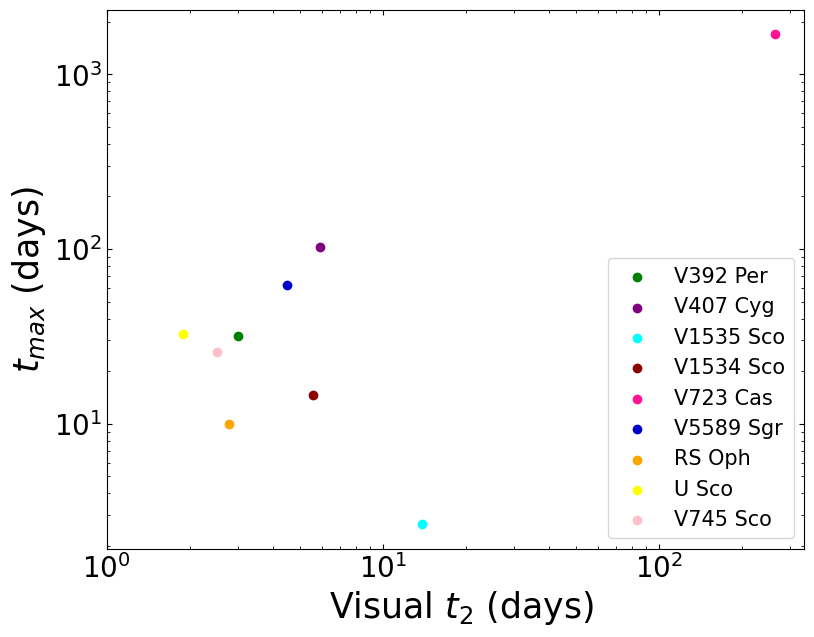

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(9,7)

#ax.plot(t2, poly(t2), color='black', linestyle=":", linewidth=2)


ax.scatter(t2[0], tmax[0], color='green', label="V392 Per")

ax.scatter(t2[1], tmax[1], color='purple', label="V407 Cyg")
            
ax.scatter(t2[2],tmax[2], color='aqua', label="V1535 Sco")
            
ax.scatter(t2[3],tmax[3], color='darkred', label="V1534 Sco")

ax.scatter(t2[4], tmax[4], color='deeppink', label="V723 Cas")

ax.scatter(t2[5], tmax[5], color='mediumblue', label="V5589 Sgr")

ax.scatter(t2[6], tmax[6], color='orange', label="RS Oph")

ax.scatter(t2[7], tmax[7], color='yellow', label="U Sco")

ax.scatter(t2[8], tmax[8], color='pink', label="V745 Sco")

#ax.plot(t2, fit_model_weights(t2), linestyle=":")

ax.set_xscale('log')
ax.set_xticks([1,10,100], labels = [r'$10^{0}$',r'$10^1$', r'$10^2$'], fontsize = 20)

ax.set_yscale('log')
ax.set_yticks([ 10, 100, 1000], labels = [r'$10^1$', r'$10^2$', r'$10^3$'], fontsize = 20)

ax.set_xlabel(r" Visual $ t_{2} $ (days)", fontsize=25)
ax.set_ylabel(r"$ t_{max} $ (days)", fontsize=25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

#ax.set_title(r"$ t_{max} $ and $ t_{2} $ Correlation", fontsize=20)

plt.legend(fontsize = 15)
plt.show()
fig.savefig("Visual_vsoptical_time", dpi=300);

## Vpeak vs Smax

Plot showing the Flux (yaxis) at the highest peak, vs the Vpeak (x-axis)

(log on y axis, not on xaxis) (for 5 GHz frequency, (Vpeak has the mag going from gretest to lowest))


In [49]:
Vpeak = df['Vpeak (optical peak apparent mag)']

Smax = df['flux max (Smax)']
Smax_err = df["Smax error"]

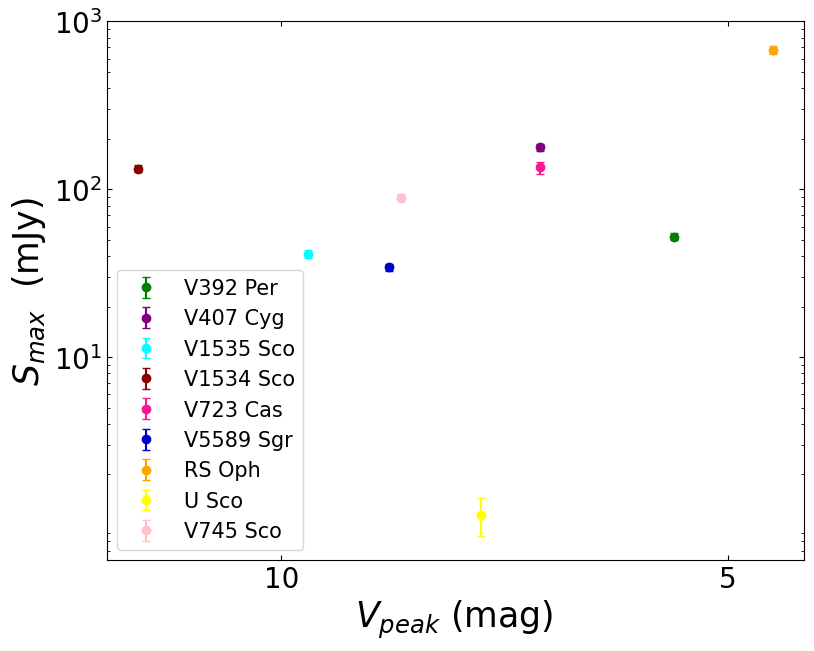

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(9,7)


ax.errorbar(Vpeak[0], Smax[0], yerr=Smax_err[0], fmt='o', color='green', label="V392 Per", capsize=3)

ax.errorbar(Vpeak[1], Smax[1], yerr=Smax_err[1], fmt='o', color='purple', label="V407 Cyg", capsize=3)

ax.errorbar(Vpeak[2], Smax[2], yerr=Smax_err[2], fmt='o', color='aqua', label="V1535 Sco", capsize=3)

ax.errorbar(Vpeak[3], Smax[3], yerr=Smax_err[3], fmt='o', color='darkred', label="V1534 Sco", capsize=3)            

ax.errorbar(Vpeak[4], Smax[4], yerr=Smax_err[4], fmt='o', color='deeppink', label="V723 Cas", capsize=3)

ax.errorbar(Vpeak[5], Smax[5], yerr=Smax_err[5], fmt='o', color='mediumblue', label="V5589 Sgr", capsize=3)

ax.errorbar(Vpeak[6], Smax[6], yerr=Smax_err[6], fmt='o', color='orange', label="RS Oph", capsize=3)

ax.errorbar(Vpeak[7], Smax[7], yerr=Smax_err[7], fmt='o', color='yellow', label="U Sco", capsize=3)

ax.errorbar(Vpeak[8], Smax[8], yerr=Smax_err[8], fmt='o', color='pink', label="V745 Sco", capsize=3)


ax.set_xticks([10,5], labels = ['10', '5'], fontsize = 20)
ax.invert_xaxis()

ax.set_yscale('log')
ax.set_yticks([1, 10, 100], labels = [r'$10^1$', r'$10^2$', r'$10^3$'], fontsize = 20)

ax.set_xlabel(r"$ V_{peak} $ (mag) ", fontsize=25)
ax.set_ylabel(r"$ S_{max} $  (mJy)", fontsize=25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

#ax.set_title(r"$ V_{peak} $ and $ S_{max} $ Correlation", fontsize=20)

plt.legend(fontsize = 15)
plt.show()
fig.savefig("Vis_vs_Optical_brightness", dpi=300);

## orbital period vs radio peak

In [51]:
Smax = df['flux max (Smax)']
Smax_err = df["Smax error"]

orbital_period = df["orbital period (hours)"]

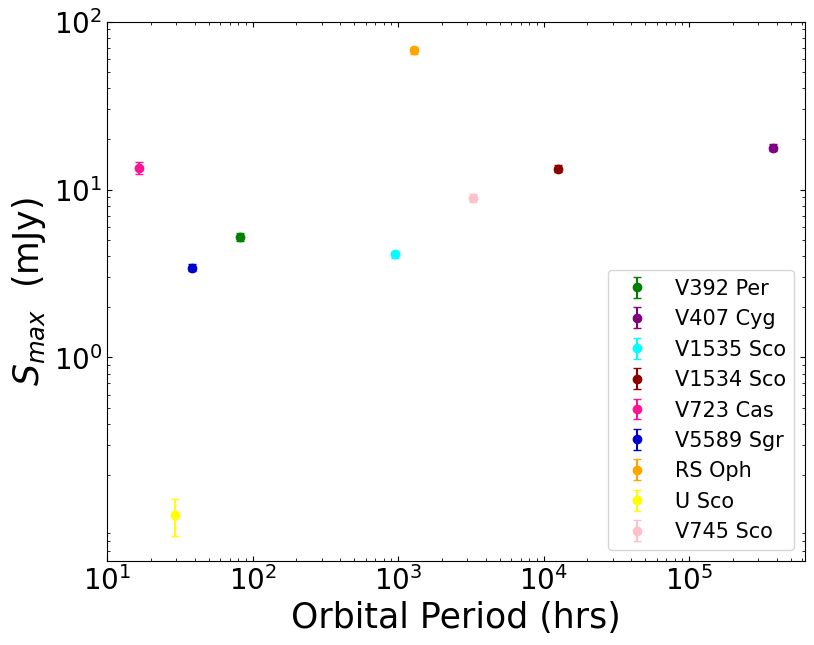

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(9,7)


ax.errorbar(orbital_period[0], Smax[0], yerr=Smax_err[0], fmt='o', color='green', label="V392 Per", capsize=3)

ax.errorbar(orbital_period[1], Smax[1], yerr=Smax_err[1], fmt='o', color='purple', label="V407 Cyg", capsize=3)

ax.errorbar(orbital_period[2], Smax[2], yerr=Smax_err[2], fmt='o', color='aqua', label="V1535 Sco", capsize=3)

ax.errorbar(orbital_period[3], Smax[3], yerr=Smax_err[3], fmt='o', color='darkred', label="V1534 Sco", capsize=3)            

ax.errorbar(orbital_period[4], Smax[4], yerr=Smax_err[4], fmt='o', color='deeppink', label="V723 Cas", capsize=3)

ax.errorbar(orbital_period[5], Smax[5], yerr=Smax_err[5], fmt='o', color='mediumblue', label="V5589 Sgr", capsize=3)

ax.errorbar(orbital_period[6], Smax[6], yerr=Smax_err[6], fmt='o', color='orange', label="RS Oph", capsize=3)

ax.errorbar(orbital_period[7], Smax[7], yerr=Smax_err[7], fmt='o', color='yellow', label="U Sco", capsize=3)

ax.errorbar(orbital_period[8], Smax[8], yerr=Smax_err[8], fmt='o', color='pink', label="V745 Sco", capsize=3)

ax.set_xscale('log')
ax.set_xticks([10, 100, 1000, 10000, 100000], labels = [r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'], fontsize = 20)

ax.set_yscale('log')
ax.set_yticks([1, 10, 100], labels = [r'$10^{0}$', r'$10^1$', r'$10^2$'], fontsize = 20)

ax.set_xlabel(" Orbital Period (hrs) ", fontsize=25)
ax.set_ylabel(r"$ S_{max} $  (mJy)", fontsize=25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

#ax.set_title(r"$ V_{peak} $ and $ S_{max} $ Correlation", fontsize=20)

plt.legend(fontsize = 15)
plt.show()
fig.savefig("Orbital Period vs Radio Peak", dpi=300);

In [53]:
velocity = df['velocity (km/s)']

tmax = df['day when flux max (tmax)']

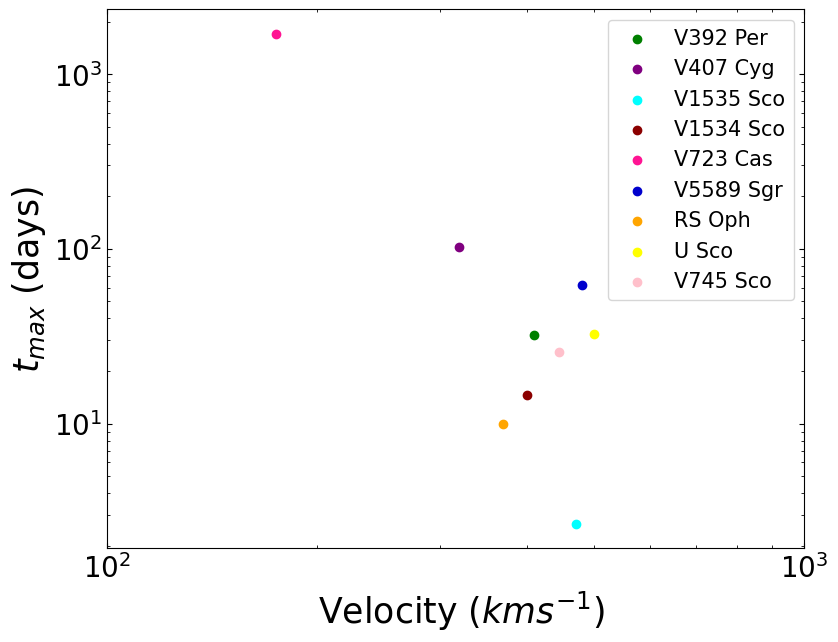

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(9,7)

#ax.plot(t2, poly(t2), color='black', linestyle=":", linewidth=2)


ax.scatter(velocity[0], tmax[0], color='green', label="V392 Per")

ax.scatter(velocity[1], tmax[1], color='purple', label="V407 Cyg")
            
ax.scatter(velocity[2],tmax[2], color='aqua', label="V1535 Sco")
            
ax.scatter(velocity[3],tmax[3], color='darkred', label="V1534 Sco")

ax.scatter(velocity[4], tmax[4], color='deeppink', label="V723 Cas")

ax.scatter(velocity[5], tmax[5], color='mediumblue', label="V5589 Sgr")

ax.scatter(velocity[6], tmax[6], color='orange', label="RS Oph")

ax.scatter(velocity[7], tmax[7], color='yellow', label="U Sco")

ax.scatter(velocity[8], tmax[8], color='pink', label="V745 Sco")

#ax.plot(t2, fit_model_weights(t2), linestyle=":")

ax.set_xscale('log')
ax.set_xticks([1000, 10000], labels = [ r'$10^2$', r'$10^3$'], fontsize = 20)

ax.set_yscale('log')
ax.set_yticks([ 10, 100, 1000], labels = [r'$10^1$', r'$10^2$', r'$10^3$'], fontsize = 20)

ax.set_xlabel(r" Velocity $(km s^{-1})$", fontsize=25)
ax.set_ylabel(r"$ t_{max} $ (days)", fontsize=25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

#ax.set_title(r"$ t_{max} $ and $ t_{2} $ Correlation", fontsize=20)

plt.legend(fontsize = 15)
plt.show()
fig.savefig("Velcoity_vsoptical_time", dpi=300);